<font face="chalkduster">
Clash of clans
===
one of new favorate game last year, users have to build their base with buildings to obtain resources, create troops and defend against attacks, 

<img src="imgs/0.png" width=80% align="center">
As well as building your base, you can also put together a raiding party and attacking other bases.
In this post, I'll describe the use of a mathematical technique called linear programming so as to get the best combination of Giants, Wizards etc in a raiding party.

To train a warrior costs Elixir (a resource that you mine and/or plunder) but also costs space in your army camps.

Here are the various warriors available to me at the moment (as you build better buildings you get more warriors etc...).

<table>
<tr>   
   <th>
   <div align="left">Barbarian<br>
                       Damage per second: 18,<br> Hitpoints: 78,<br> Housing Space: 1,<br> Elixir Cost: 80</div>
   </th>
   <th>
   <div align="left">Archer <br>
   Damage per second: 16,<br>
   Hitpoints: 33, <br>Housing Space: 1,<br> Elixir Cost: 160</div>
   </th>
   <th>
   <div align="left">Goblin <br>
   Damage per second: 19,<br> Hitpoints: 36,<br> Housing Space: 1,<br> Elixir Cost: 60)</div>
   </th>
<tr>
<tr>
   <div align="center">
   <td><img src="imgs/1.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/2.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/3.png" width=50% />
   </td>
   </div>
<tr>
<tr>   
   <th>
   <div align="left">Giant <br>Damage per second: 24,<br>
   Hitpoints: 520,<br> Housing Space: 5,<br> Elixir Cost: 2000 </div>
   </th>
   <th>
   <div align="left">Wall Breaker <br>Damage per second: 32,<br> Hitpoints: 35,<br>
   Housing Space: 2,<br> Elixir Cost: 2500</div>
   </th>
   <th>
   <div align="left"> Balloon <br>Damage per second: 72,<br> Hitpoints: 280,<br>
   Housing Space: 5,<br> Elixir Cost: 3500)</div>
   </th>
<tr>

<tr>
   <div align="center">
   <td><img src="imgs/4.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/5.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/6.png" width=50% />
   </td>
   </div>
<tr>
<tr>   
   <th>
   <div align="left">Wizards <br>Damage per second: 125,<br> Hitpoints: 130,<br>
   Housing Space: 4,<br> Elixir Cost: 3000</div>
   </th>
   <th>
   <div align="left">Healer <br>Damage per second: NA, <br>Hitpoints: 600,<br>
   Housing Space: 14,<br> Elixir Cost: 6000</div>
   </th>
   <th>
   <div align="left">Dragon <br>Damage per second: 140,<br> Hitpoints: 1900,<br>
   Housing Space: 20,<br> Elixir Cost: 25000</div>
   </th>
<tr>

<tr>
   <div align="center">
   <td><img src="imgs/7.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/8.png" width=50% />
   </td>
   </div>
   <div align="center">
   <td><img src="imgs/9.png" width=50% />
   </td>
   </div>
<tr>
<tr>
</table>
</font>
Requirement
---
1. glpk: GNU/glpk
2. cvxopt
3. PuLP

```
   PuLP is an LP modeler written in python. PuLP can generate MPS or LP 
   files and call GLPK[1], COIN CLP/SBB[2], CPLEX[3] and XPRESS[4] to solve 
   linear problems. 
   install:
   > pip install pulp


```

 

<big><big>
$$\mathbf{\color{red}{\ddagger\dagger\dagger\dagger\dagger\dagger\dagger\dagger\dagger\ddagger}}$$
</big></big>

Solver of <font color="red">integer</font> Linear Programming
---
The syntax of ```ilp``` is shown via using "help(cvxopt.glpk.ilp)":

```python
 Solves a mixed integer linear program using GLPK.
    
    (status, x) = ilp(c, G, h, A, b, I, B)
    
    PURPOSE
    Solves the mixed integer linear programming problem
    
        minimize    c'*x
        subject to  G*x <= h
                    A*x = b
                    x[k] is integer for k in I
                    x[k] is binary for k in B
```

Warming Up
---
**Minimize** $2x_1+x_2$<br>
**subject to:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;$-x_1+x_2\le1$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$-x_1-x_2\le-2\quad(\text{i.e. }x_1+x_2\ge2)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\qquad -x_2\le0\quad(\text{i.e. }x_2\ge0)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$x_1-2x_2\le4$<br>

How CVXOPT Work
---
- variable
  $$x_{2\times1}=\left[\matrix{x_1\\x_2}\right]$$
- problem
  minimize $\mathbf{c_{1\times2} x_{2\times1}}$ where
  $$c_{1\times2}=\left[\matrix{2 &1}\right]$$
- with constrains  
  reconstruct all $n$ conditions into matrix, including bounds of variables, 
  $\mathbf{x^t_{1\times2}A_{2\times n}=b_{1\times n}}$, i.e.
\begin{eqnarray}  
  A_{2\times n} &=&   \left[\matrix{-1 &-1&0&1 \\ 1 &-1&-1&-2}\right]\\
  b &=& \left[\matrix{1 &-2&0&4}\right]
\end{eqnarray}  



In [185]:
from cvxopt import matrix, solvers,glpk
A = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
b = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
sol=solvers.lp(c,A,b);
print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
[ 5.00e-01]
[ 1.50e+00]



This shows the solution is in **floating**, $(x_1,x_2)=(0.5,1.5)$,<br> but how about the solution in **integer**?
By solver, **glpk.ilp**, we can also consider the solution in interger,  $(x_1,x_2)=(1,1)$, as follows:

In [194]:
G = matrix([[1,-1,0,0],
            [1,0,-1,0],
            [1,0,0,-1],
          ],tc='d') # The the cost vector

h=matrix([1,0,0,0],tc='d')
c = matrix([-1,-2,-3],tc='d')

(x,status)=glpk.ilp(c,G,h,I=set([0,1,2]))
print("%s, %s" %(x,status))
print("Solution of (X1,X2) is (%s,%s)." %(int(status[0]), int(status[1])))

optimal, [ 0.00e+00]
[ 0.00e+00]
[ 1.00e+00]

Solution of (X1,X2) is (0,0).


In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
from IPython.display import HTML
from cvxopt import matrix, solvers,glpk

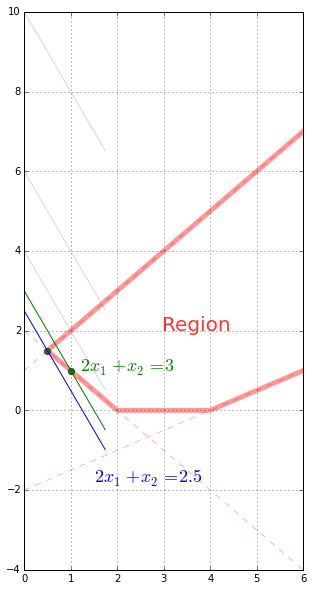

In [171]:
plt.figure(figsize=(5,10))
x1=np.linspace(0,6,101)
l1=1+x1
l2=2-x1
l3=0.5*x1-2
solf=2.5-2*x1
soli=3-2*x1

sol11=4-2*x1
sol12=6-2*x1
sol13=10-2*x1

plt.plot(x1,l1,'r--',alpha=0.3)
plt.plot(x1,l2,'r--',alpha=0.3)
plt.plot(x1,l3,'r--',alpha=0.3)
plt.plot((6,.5,2,4,6),(7,1.5,0,0,1),color="red",linewidth=5,alpha=0.4)

plt.text(3,2,"Region",fontsize=20,color="red",alpha=0.8)
plt.text(1.5,-1.8,r'$2x_1+x_2=2.5$',fontsize=18,color="blue")
plt.text(1.2,1,r'$2x_1+x_2=3$',fontsize=18,color="green")

plt.plot([0.5,1.],[1.5,1.], 'og')
plt.grid()
plt.plot(x1[:30],solf[:30],color="blue")
plt.plot(x1[:30],soli[:30],color="green")

#plt.plot(x1[:30],sol11[:30],color="gray",alpha=0.3)
#plt.plot(x1[:30],sol12[:30],color="gray",alpha=0.3)
#plt.plot(x1[:30],sol13[:30],color="gray",alpha=0.3)
#,x1,l2,x1,l3)

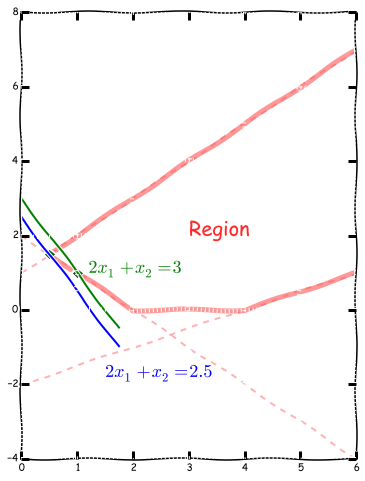

In [203]:
with(plt.xkcd()):
  plt.figure(figsize=(6,8))
  
  plt.plot(x1,l1,'r--',alpha=0.3)
  plt.plot(x1,l2,'r--',alpha=0.3)
  plt.plot(x1,l3,'r--',alpha=0.3)
  plt.plot((6,.5,2,4,6),(7,1.5,0,0,1),color="red",linewidth=5,alpha=0.4)

  plt.text(3,2,"Region",fontsize=20,color="red",alpha=0.8)
  plt.text(1.5,-1.8,r'$2x_1+x_2=2.5$',fontsize=18,color="blue")
  plt.text(1.2,1,r'$2x_1+x_2=3$',fontsize=18,color="green")

  plt.plot([0.5,1.],[1.5,1.], 'Dg')
  plt.grid(True)
  plt.plot(x1[:30],solf[:30],color="blue")
  plt.plot(x1[:30],soli[:30],color="green")  

Observation
---

The linear constraints, ($\sum a_{in} x_{i}\le b_{n}$), make the region having linear boundary, reference above. While the following optimal problem is considered:
$$ \sum c_{in}x_i$$
the solution could be found by moving the following planes (or lines) parallelled 
$$ \sum c_{in}x_i = C$$
until not intersected with the region and the optimal solution is the biggest or smallest one among $C$.


```Thus the optimal position is almost occured at certain corner of region or certain point near boundary (integer optimal case). ```


Optimization with bounds
---
maximize $x_1 + x_2$ 
```
s.t:
 X2 + X6      = 2
 X1 + X2 + X5 = 2
 X1 + X4      = 2
 X1           >=0
 X2           >=0 
``` 

In [1]:
from cvxopt import matrix, solvers,glpk 
A = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ]) 
b = matrix([ 1.0, -2.0, 0.0, 4.0 ]) 
c = matrix([ 2.0, 1.0 ]) 
sol=solvers.lp(c,A,b); print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.
[ 5.00e-01]
[ 1.50e+00]



In [2]:
import cvxopt.glpk
import cvxopt
c=cvxopt.matrix([1,1,0,0,0,0])
G=cvxopt.matrix([[1.0,0,0,0,0,0], [0,1,0,0,0,0]])
h=cvxopt.matrix([0.0,0.0])
A=cvxopt.matrix([[0.0,1,0,0,0,6], [1,1,0,0,1,0], [1,0,0,1,0,0]])
b=cvxopt.matrix([2.0, 2, 2])
(status, c)=cvxopt.glpk.ilp(-c,-(G.T),-h,A.T,b,I=set([0,1,2,3,4,5]))
print(status, c)

optimal [ 0.00e+00]
[ 2.00e+00]
[ 0.00e+00]
[ 2.00e+00]
[ 0.00e+00]
[ 0.00e+00]



<big><big>
$$\mathbf{\color{red}{\dagger\dagger\dagger\dagger\dagger\dagger\dagger\dagger\dagger\dagger}}$$
</big></big>

Back to the Game
---

To summarise the information about the players I'm going to put the costs in a vector $c$ and the housing space in a vector $h$ (indexed using the same order as the images above):

$$c=(80,160,60,2000,2500,3500,3000,6000,25000)$$
$$ h=(1,1,1,5,2,5,4,14,20)$$

Currently we have a capacity of 50 housing spaces per camp and I have 4 camps so we have an upper bound on the total amount of housing space of $K=200$.

If we let the vector $x$ denote a raiding party so that $x_i$ is the number of warriors of type $i$ (using the ordering above) then we have the corresponding housing space constraint:
$$\sum_{i=1}^9h_ix_i\leq K$$

we can now try and do two things:

- Get a full set of camps by minimising the overall cost.
- Get the most powerful raiding party that can fit in my camps.

we will solve both of these problems using what is called ```Integer Linear Programming```. The integer part of that is due to the fact that we must have whole parts of warriors.

Minimising my costs
---
The cost of a given rading party $x$ is given by:
$$C(x) = \sum_{i=1}^9c_ix_i$$

Thus to minimise this cost and fill the camps we need to solve the following minimisation problem:
$$ \text{minimise }C(x) = \sum_{i=1}^9c_ix_i$$

such that:
$$H(x)=\sum_{i=1}^9h_ix_i= K$$
and
$$x_i\in\mathbb{Z}_{\geq0}$$
Now solve the problem by ```cvxopt.glpk.ilp```:

In [2]:
G = matrix([[1.0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0],
            [0,0,0,0,0,1,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1]
          ]) # The the cost vector

A = matrix([1,1,1,5,2,5,4,14,20],tc='d')
b=matrix([200],tc='d')

c = matrix([80,160,60,2000,2500,3500,3000,6000,25000] ,tc='d') # Set the 'housing space' constraints vector
#h=matrix([200,0,0,0,0,0,0,0,0,0],tc='d')
h=matrix([0.0,0,0,0,0,0,0,0,0])

(x,status)=glpk.ilp(c,-G.T,-h,A.T,b,I=set([0,1,2,3,4,5,6,7,8]))
print("%s, %s" %(x,status))

optimal, [ 0.00e+00]
[ 0.00e+00]
[ 2.00e+02]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [4]:
def sol(x):
    l='<table><tr><th>Barbarian</th><th>Archer</th><th>Goblin</th>'
    l=l+'<th>Giant</th><th>Wall Breaker</th><th>Balloon</th>'
    l=l+'<th>Wizards</th><th>Healer</th><th>Dragon</th></tr><tr>'
    for i in range(len(x)):
        l=l+'<td><div align="center">%s</div></td>' %(int(x[i]))
    l=l+"</tr></table>"
    return(HTML(l))

In [5]:
sol(status)

Barbarian,Archer,Goblin,Giant,Wall Breaker,Balloon,Wizards,Healer,Dragon
0,0,200,0,0,0,0,0,0


The output is (disappointing but expected): $x=(0,0,200,0,0,0,0,0)$ which implies that I should have 200 Goblins.

If you're familiar with the game this is not a very sensible way to go as Goblins are really only good at getting loot from defenceless bases.

We can add a couple more constraints so that we don't have too many goblins (let's limit it to 10) and also so that we have at least one healer:



Next
---
Now two additional conditions added
- $x_2\le10$ (i.e. <font color="red">$-x_2\ge-10$</font>): Don't want more than 10 goblins
- $x_7\ge1$: Want 1 healer at least

In [6]:
G = matrix([[1.0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0],
            [0,0,0,0,0,1,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1],
            [0,0,-1,0,0,0,0,0,0],
          ]) # The the cost vector

h=matrix([0.0,0,0,0,0,0,0,1,0,-10])


A = matrix([1,1,1,5,2,5,4,14,20],tc='d')
b=matrix([200],tc='d')

c = matrix([80,160,60,2000,2500,3500,3000,6000,25000] ,tc='d') # Set the 'housing space' constraints vector
#h=matrix([200,0,0,0,0,0,0,0,0,0],tc='d')

(x,status)=glpk.ilp(c,-G.T,-h,A.T,b,I=set([0,1,2,3,4,5,6,7,8]))
sol(status)

Barbarian,Archer,Goblin,Giant,Wall Breaker,Balloon,Wizards,Healer,Dragon
176,0,10,0,0,0,0,1,0


This gives us $x=(176,0,10,0,0,0,0,1,0)$.

This is again not very satisfying as we're basically filling our raiding party with the cheapest options. That was the purpose of this approach though. 

The next thing we'll look at is how to actually get a good raiding part.

Getting the 'best' raiding party.
---
As you can see on the images, every warrior is different: some fly, some are better against buildings, some have more hitpoints than others etc...

One way of getting the 'best' raiding party could be to maximise the damage per second of the raiding party. To do this, let's define the following vector (which is just the damage per second that can be read off of the images above):

$$d=(18,16,19,24,32,72,125,0,140)$$



Now our maximisation problem can be written as:

$$\text{maximise } \sum_{i=1}^9d_ix_i$$


such that:

$$H(x)=\sum_{i=1}^9h_ix_i\leq K$$

and
$$x_i\in\mathbb{Z}_{\geq0}$$


Here's the complete code to do this:


In [7]:
damagepersecond = matrix([18, 16, 19, 24, 32, 72, 125, 0, 140],tc='d')

G = matrix([[1.0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0],
            [0,0,0,0,0,1,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1],
            [0,0,-1,0,0,0,0,0,0],
            [-1,-1,-1,-5,-2,-5,-4,-14,-20]
          ]) # The the cost vector

h=matrix([0.0,0,0,0,0,0,0,1,0,-10,-200])


#A = matrix([1,1,1,5,2,5,4,14,20],tc='d')
#b=matrix([200],tc='d')

c= matrix([18, 16, 19, 24, 32, 72, 125, 0, 140],tc='d')

(x,status)=glpk.ilp(-c,-G.T,-h,I=set([0,1,2,3,4,5,6,7,8]))
sol(status)

Barbarian,Archer,Goblin,Giant,Wall Breaker,Balloon,Wizards,Healer,Dragon
0,0,2,0,0,0,46,1,0


The result of the above is $x=(0,0,2,0,0,0,46,1,0)$. I.e take 2 goblins, 46 wizards and 1 healer.
The problem with this raiding party is that wizards are actually quite fragile (archers towers and cannons can pretty much just pick them off).

So perhaps instead of maximising the damage per second we could maximise the total hit points of the party.

To do this we need to define the vector of hitpoints:

$$p=(78,33,36,520,35,280,130,600,1900)$$


Now our maximisation problem can be written as:
$$\text{maximise } \sum_{i=1}^9p_ix_i$$

such that:

$$H(x)=\sum_{i=1}^9h_ix_i\leq K$$

and
$$x_i\in\mathbb{Z}_{\geq0}$$


Here's the Sage code to do this:


The problem with this is that wall breakers are good for just that: breaking walls. They carry a bomb up to a wall and then they explode. So let's add some more constraints to our optimisation problem so as to get something a bit more useful.
Let's make sure that we always have at least 20 housing capacity worth of distance attackers (Archers or Wizards):
$$x_1h_1+x_6h_6 \geq 20$$

Let's ensure that we have at least 1 air attacker (so that once the air defenses are out of the way we can finish off the base):
$$x_5+x_8\geq1 $$

Let's ensure that we always have some wall breakers to clear the walls for our ground units (1 per 5 giants and 1 per 20 barbarians say):
$$ 5x_4\geq x_3$$


$$20x_4\geq x_0 $$

The code to solve this is given here:

In [8]:
damagepersecond = matrix([18, 16, 19, 24, 32, 72, 125, 0, 140],tc='d')

G = matrix([[1.0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0],
            [0,0,0,0,0,1,0,0,0],
            [0,0,0,0,0,0,1,0,0],
            [0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,1],
            [0,0,-1,0,0,0,0,0,0],
            [-1,-1,-1,-5,-2,-5,-4,-14,-20],
            [0,1,0,0,0,0,4,0,0],
            [0,0,0,0,0,1,0,0,1],
            [0,0,0,-1,5,0,0,0,0],
            [-1,0,0,0,20,0,0,0,0]
          ]) # The the cost vector

h=matrix([0.0,0,0,0,0,0,0,1,0,-10,-200,20,1,0,0])


#A = matrix([1,1,1,5,2,5,4,14,20],tc='d')
#b=matrix([200],tc='d')

p=matrix([78,33,36,520,35,280,130,600,1900],tc='d')
c= p

(x,status)=glpk.ilp(-c,-G.T,-h,I=set([0,1,2,3,4,5,6,7,8]))
#print("%s, %s" %(x,status))
sol(status)

Barbarian,Archer,Goblin,Giant,Wall Breaker,Balloon,Wizards,Healer,Dragon
1,20,0,23,5,0,0,1,2




This gives $x=(1,20,0,23,5,0,0,1,2)$: so take 1 Barbarian, 20 Archers, 23 Giants, 5 Wall Breakers, 1 Healer and 2 Dragons.

The above would give us the most hit points but now we're missing out on **the damage power of wizards**.

Perhaps we could try and balance both hitpoints damage.

In essence we have what's called a multi objective optimisation problem. One approach to solve this is to simply weight both objectives.

We're going to use $\alpha$ to denote the importance of the hitpoints and $1-\alpha$ the importance of the damage.

Our optimisation function then becomes:
$$\alpha\sum_{i=1}^9p_ix_i+(1-\alpha)\sum_{i=1}^9d_ix_i$$


In [9]:
alpha0=0.5

c= alpha0*p+(1-alpha0)*damagepersecond
(x,status)=glpk.ilp(-c,-G.T,-h,I=set([0,1,2,3,4,5,6,7,8]))
#print("%s, %s" %(x,status))
sol(status)

Barbarian,Archer,Goblin,Giant,Wall Breaker,Balloon,Wizards,Healer,Dragon
11,0,0,25,5,0,5,1,1



Using the same constraints as before and taking α=.5 (so that both damage and hit points have equal weighting) we get $x=(11,0,0,25,5,0,5,1,1)$. Thus we should be taking in to battle: 11 Barbarians, 25 Giants, 5 Wall Breakers, 5 Wizards, 1 Healer and 1 Dragon.

This feels much more balanced than anything we've had so far and not far off what I've been using as my own raiding party.

Given that everything is nicely coded 
we can quickly obtain the make up of the optimal raiding party for a range of values of  $\alpha$:


In [11]:
n=50
alphaInd=np.linspace(0,1,n+1)
Barbarian=np.zeros(n+1,dtype=int)
Archer=Barbarian.copy()
Goblin=Barbarian.copy()
Giant=Barbarian.copy()
WallBreaker=Barbarian.copy()
Balloon=Barbarian.copy()
Wizards=Barbarian.copy()
Healer=Barbarian.copy()
Dragon=Barbarian.copy()
for i in range(len(alphaInd)):
    c= alphaInd[i]*p+(1-alphaInd[i])*damagepersecond

    (x,status)=glpk.ilp(-c,-G.T,-h,I=set([0,1,2,3,4,5,6,7,8]))
    Barbarian[i]=status[0]
    Archer[i]=status[1]
    Goblin[i]=status[2]
    Giant[i]=status[3]
    WallBreaker[i]=status[4]
    Balloon[i]=status[5]
    Wizards[i]=status[6]
    Healer[i]=status[7]
    Dragon[i]=status[8]

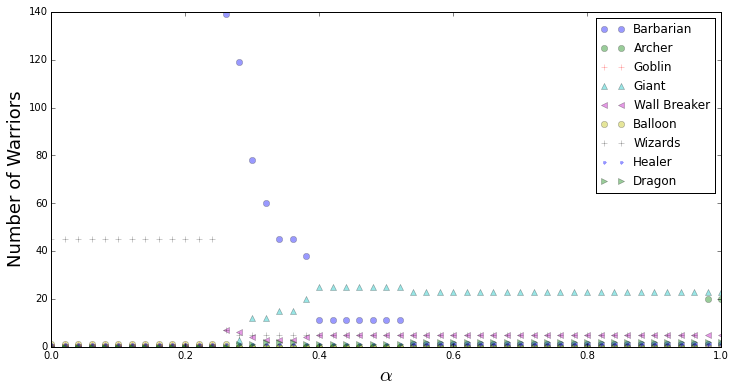

In [207]:
plt.figure(figsize=(12,6))
plt.plot(alpha,Barbarian,'o',alpha,Archer,'o',alpha,Goblin,'+',alpha,Giant,'^',alpha,WallBreaker,'<', \
         alpha,Balloon,'o', \
         alpha,Wizards,'+',alpha,Healer,'.',alpha,Dragon,'>',alpha=0.4)
plt.legend(('Barbarian','Archer','Goblin','Giant','Wall Breaker','Balloon','Wizards','Healer','Dragon'))
plt.ylabel('Number of Warriors',size=18)
plt.xlabel(r'$\alpha$',size=20)

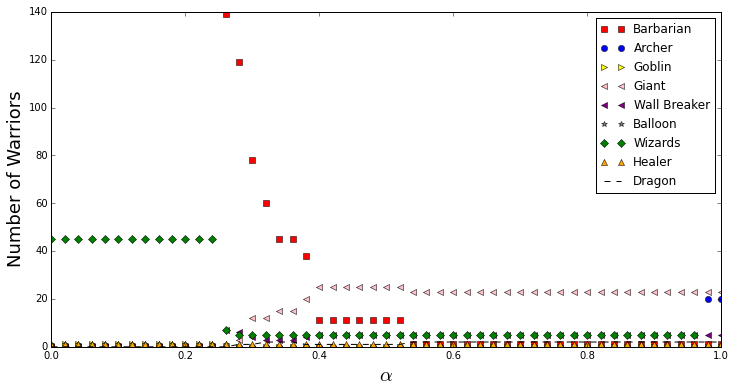

In [31]:
plt.figure(figsize=(12,6))
plt.plot(alphaInd,Barbarian,'s',color="red")
plt.plot(alphaInd,Archer,'o',color="blue")
plt.plot(alphaInd,Goblin,'>',color="yellow")
plt.plot(alphaInd,Giant,'<',color="pink")
plt.plot(alphaInd,WallBreaker,'<',color="purple")
plt.plot(alphaInd,Balloon,'*',color="gray")
plt.plot(alphaInd,Wizards,'D',color="green")
plt.plot(alphaInd,Healer,'^',color="orange")
plt.plot(alphaInd,Dragon,'--',color="black")

plt.legend(('Barbarian','Archer','Goblin','Giant','Wall Breaker','Balloon','Wizards','Healer','Dragon'))
plt.ylabel('Number of Warriors',size=18)
plt.xlabel(r'$\alpha$',size=20)

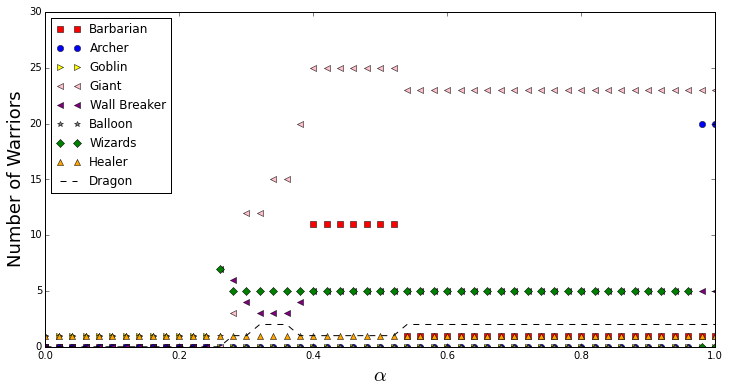

In [37]:
plt.figure(figsize=(12,6))
plt.plot(alphaInd,Barbarian,'s',color="red")
plt.plot(alphaInd,Archer,'o',color="blue")
plt.plot(alphaInd,Goblin,'>',color="yellow")
plt.plot(alphaInd,Giant,'<',color="pink")
plt.plot(alphaInd,WallBreaker,'<',color="purple")
plt.plot(alphaInd,Balloon,'*',color="gray")
plt.plot(alphaInd,Wizards,'D',color="green")
plt.plot(alphaInd,Healer,'^',color="orange")
plt.plot(alphaInd,Dragon,'--',color="black")

plt.legend(('Barbarian','Archer','Goblin','Giant','Wall Breaker','Balloon','Wizards','Healer','Dragon'),loc='upper left')
plt.ylabel('Number of Warriors',size=18)
plt.ylim([0,30])
plt.xlabel(r'$\alpha$',size=20)

We see that as α increases (so that we care more about hit points) the number of Wizards we should use slowly decreases (at one point the constraint for ranged attacking units kicks in and we replace the Wizards with Archers).

You could easily tweak the constraints to perhaps ensure your party always has some Goblins or otherwise. I think this is a nice example where a mathematical model can be used to solve a problem but at the same time must not be taken far from the problem itself. There might be some players who only choose to attack bases with a particular type of defence so they can tweak/add constraints to the problem accordingly.
